<a href="https://colab.research.google.com/github/Untick/resume-builder-gr2/blob/main/Kirill_Samokhin/Samokhin_Usedesk_Dataset1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version


Python 3.10.6


In [ ]:
import numpy as np
print(np.__version__)

1.23.5


In [ ]:

%%capture
pip install --upgrade numpy


In [ ]:
# Запустить эту ячейку, затем перезапустить среду
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.9/851.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling

In [ ]:
!pip install gdown

In [ ]:
!pip install seaborn

In [ ]:
# Загрузка датасетов из облака google
import gdown
# Подключить Google диск
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

In [ ]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop # Оптимизаторы
from tensorflow.keras.preprocessing.text import Tokenizer # Токенизатор для преобразование текстов в последователь

In [ ]:

import numpy as np
# Работа с табличными данными
import pandas as pd
# Работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,auc, f1_score, confusion_matrix,precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
# Инпорт ансамблевых моделей
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Функция для вывода результата
def my_display_result(y_test, y_pred):
    y_pred_argmax = np.argmax(y_pred, axis=1) # Возвращает индексы максимальных значений по оси.
    plt.figure(figsize=(8,4))
    #
    sns.heatmap(confusion_matrix(y_test, y_pred_argmax), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d')
    # sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
    my_precision_score = precision_score(y_test,y_pred_argmax)
    my_recall_score = recall_score(y_test,y_pred_argmax)
    my_f1 = my_f1_score(my_precision_score, my_recall_score)
    print('precision score: ', round(my_precision_score, 2))
    print('recall score: ', round(my_recall_score, 2))
    print('f1 score: ', round(my_f1, 2))


# Проверяем количество вхождений y = 1 в y_train и y_test
def occurrences (y_train, y_test):
  # Подсчет количества вхождений y_train
  unique, counts = np.unique(y_train, return_counts=True)
  # Вывести количество вхождений y_train
  for val, count in zip(unique, counts):
      print(f"{val}: {count}")
      if val == 1:
        count_y1_in_train = count
         # Подсчет количества вхождений of y_test
  unique, counts = np.unique(y_test, return_counts=True)
  for val, count in zip(unique, counts):
      print(f"{val}: {count}")
      if val == 1:
        count_y1_in_test = count

  count_1_elements_20_persent = 0
  count_1_elements_20_persent =  (count_y1_in_train + count_y1_in_test)*0.2
  result = "    Distribution is correct " if round(count_1_elements_20_persent) == round(count_y1_in_test) else "    Distribution is false"
  print("20% of sum in 1 in y_train and y_test is:", round(count_1_elements_20_persent), result)



In [ ]:

# Загружаем датасет в панду
df = pd.read_csv('/content/sample_data/usedesk21.csv')

# Вывод количества  признаков
print(df.shape)

df.head()

(2256, 43)


,#NAME?,#NAME?.1,company_id,рейтинг,месяц,всего,есть ответ,выполнен,закрыт,nps,...,extreme,агент+,агент-,каналы+ all,каналы+ p,каналы- all,каналы- p,правила_cnt,nps_cnt,nps_avg
0,#NAME?,NaN,1,1,1,1110,146,40,124,4,...,0,0,14,13,1,35,2,0,NaN,NaN
1,#NAME?,NaN,1,1,2,2615,416,54,672,101,...,4,5,2,60,25,79,12,0,NaN,NaN
2,#NAME?,NaN,1,1,3,4226,639,167,625,140,...,2,11,22,101,10,100,21,0,NaN,NaN
3,#NAME?,NaN,1,1,4,3484,351,61,685,158,...,3,5,3,42,8,48,4,0,NaN,NaN
4,#NAME?,NaN,1,1,5,3950,620,117,559,51,...,13,2,0,63,9,56,17,0,NaN,NaN


In [ ]:

# Создаем копию датасета
data_backup = df.copy()

In [ ]:
# Информация о датасете
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   #NAME?                  2256 non-null   object 
 1   #NAME?.1                0 non-null      float64
 2   company_id              2256 non-null   int64  
 3   рейтинг                 2256 non-null   int64  
 4   месяц                   2256 non-null   int64  
 5   всего                   2256 non-null   int64  
 6   есть ответ              2256 non-null   int64  
 7   выполнен                2256 non-null   int64  
 8   закрыт                  2256 non-null   int64  
 9   nps                     2256 non-null   int64  
 10  email                   2256 non-null   int64  
 11  telephony               2256 non-null   int64  
 12  api                     2256 non-null   int64  
 13  usedesk_chat            2256 non-null   int64  
 14  vk                      2256 non-null   

In [ ]:
# заменяем NaN на 0
df = df.fillna (0)

In [ ]:
# Распределение числа месяцев по рейтингу
print(df.рейтинг.value_counts())

2    708
1    654
0    516
3    378
Name: рейтинг, dtype: int64


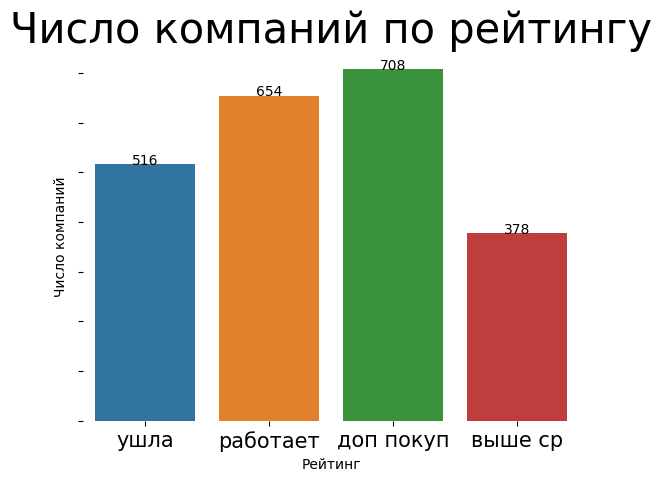

In [ ]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(x=df["рейтинг"])
g.set_xticklabels(['ушла','работает','доп покуп','выше ср'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)


plt.xlabel('Рейтинг')
plt.ylabel('Число компаний')
plt.title('Число компаний по рейтингу', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [ ]:
# Создаем LabelEncoder
le = LabelEncoder()

# Переводим все столбцы в числовые значения циклом
for column_name in df.select_dtypes(exclude=['float', 'int']).columns:
    df[column_name] = le.fit_transform(df[column_name])

In [ ]:
# Выделим целевую метрику
# y = df.рейтинг
y = df.iloc[:,3]

# Выделим остальную выборку
X = df.drop(['#NAME?','#NAME?.1','рейтинг'], axis=1)

# Сохраним метрики в файл
with open ('my_y.csv', 'w') as file:
   y.to_csv('my_y.csv', index=False)

# Сохраним выборку в файл
with open ('my_X.csv', 'w') as file:
   X.to_csv('my_X.csv', index=False)



In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2251    2
2252    2
2253    2
2254    2
2255    2
Name: рейтинг, Length: 2256, dtype: int64

In [ ]:
for i in range(0, len(y)):
  if y[i] > 1:
    y[i] = 1

<ipython-input-16-de062786eb26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2251    1
2252    1
2253    1
2254    1
2255    1
Name: рейтинг, Length: 2256, dtype: int64

In [ ]:
y.info()
y.shape



<class 'pandas.core.series.Series'>
RangeIndex: 2256 entries, 0 to 2255
Series name: рейтинг
Non-Null Count  Dtype
--------------  -----
2256 non-null   int64
dtypes: int64(1)
memory usage: 17.8 KB


(2256,)

In [ ]:
X

,company_id,месяц,всего,есть ответ,выполнен,закрыт,nps,email,telephony,api,...,extreme,агент+,агент-,каналы+ all,каналы+ p,каналы- all,каналы- p,правила_cnt,nps_cnt,nps_avg
0,1,1,1110,146,40,124,4,102,23,856,...,0,0,14,13,1,35,2,0,0.0,0.0
1,1,2,2615,416,54,672,101,309,20,1924,...,4,5,2,60,25,79,12,0,0.0,0.0
2,1,3,4226,639,167,625,140,499,47,3059,...,2,11,22,101,10,100,21,0,0.0,0.0
3,1,4,3484,351,61,685,158,341,102,2587,...,3,5,3,42,8,48,4,0,0.0,0.0
4,1,5,3950,620,117,559,51,334,27,3035,...,13,2,0,63,9,56,17,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,376,2,28074,27996,28066,1,0,324,0,0,...,1,0,0,0,0,0,0,0,1.0,1.0
2252,376,3,6330,6297,6299,22,0,315,0,0,...,0,3,1,1,0,1,0,0,1.0,1.0
2253,376,4,35179,34848,17682,17485,0,34,0,0,...,0,0,1,1,0,0,0,0,1.0,1.0
2254,376,5,7735,6235,383,5854,0,0,0,0,...,0,4,0,3,0,3,1,0,0.0,0.0


# Найдем лучшие признаки для оценки с помощью  **SelectKBest**

In [ ]:
# Выделим 40 наиболее важных признаков с помощью SelectKBest
model = SelectKBest(score_func=f_regression, k=40)
fit = model.fit(X,y)
score =pd.DataFrame(fit.scores_)
priznak=pd.DataFrame(X.columns)
# Соединяем два датафрейма для лучше визуализации
featureScores = pd.concat([priznak,score],axis=1)
featureScores.columns = ['Priznak','Score']  # названия столбцов нового датафрейма
print(featureScores.nlargest(40,'Score'))  # печатаем лучшие признаки


                   Priznak         Score
37             правила_cnt  1.208014e+02
0               company_id  7.000402e+01
3               есть ответ  5.117128e+01
6                      nps  4.429199e+01
23                question  3.635335e+01
2                    всего  3.593687e+01
28                  medium  3.206857e+01
10            usedesk_chat  3.019551e+01
5                   закрыт  2.809119e+01
4                 выполнен  2.540248e+01
16               instagram  2.451868e+01
13                whatsapp  1.960212e+01
38                 nps_cnt  1.409932e+01
12                telegram  1.157063e+01
39                 nps_avg  1.132111e+01
25                 problem  1.060384e+01
27                     low  1.006151e+01
26                incident  9.991767e+00
24                    task  8.923245e+00
7                    email  8.461222e+00
8                telephony  7.986260e+00
9                      api  6.904173e+00
18  pact_telegram_personal  5.375252e+00
35             к

<Axes: >

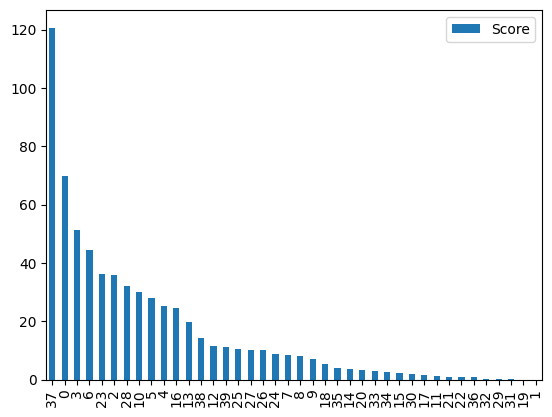

In [ ]:
featureScores.nlargest(40,'Score').plot(kind='bar')


# Составим тепловую карту кореляции признаков с помощью **Heatmap**

In [ ]:
df_cor = df.drop(['#NAME?','#NAME?.1'], axis=1) # Удалим пустые колонки
df_cor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_id              2256 non-null   int64  
 1   рейтинг                 2256 non-null   int64  
 2   месяц                   2256 non-null   int64  
 3   всего                   2256 non-null   int64  
 4   есть ответ              2256 non-null   int64  
 5   выполнен                2256 non-null   int64  
 6   закрыт                  2256 non-null   int64  
 7   nps                     2256 non-null   int64  
 8   email                   2256 non-null   int64  
 9   telephony               2256 non-null   int64  
 10  api                     2256 non-null   int64  
 11  usedesk_chat            2256 non-null   int64  
 12  vk                      2256 non-null   int64  
 13  telegram                2256 non-null   int64  
 14  whatsapp                2256 non-null   

In [ ]:
y[0]

1

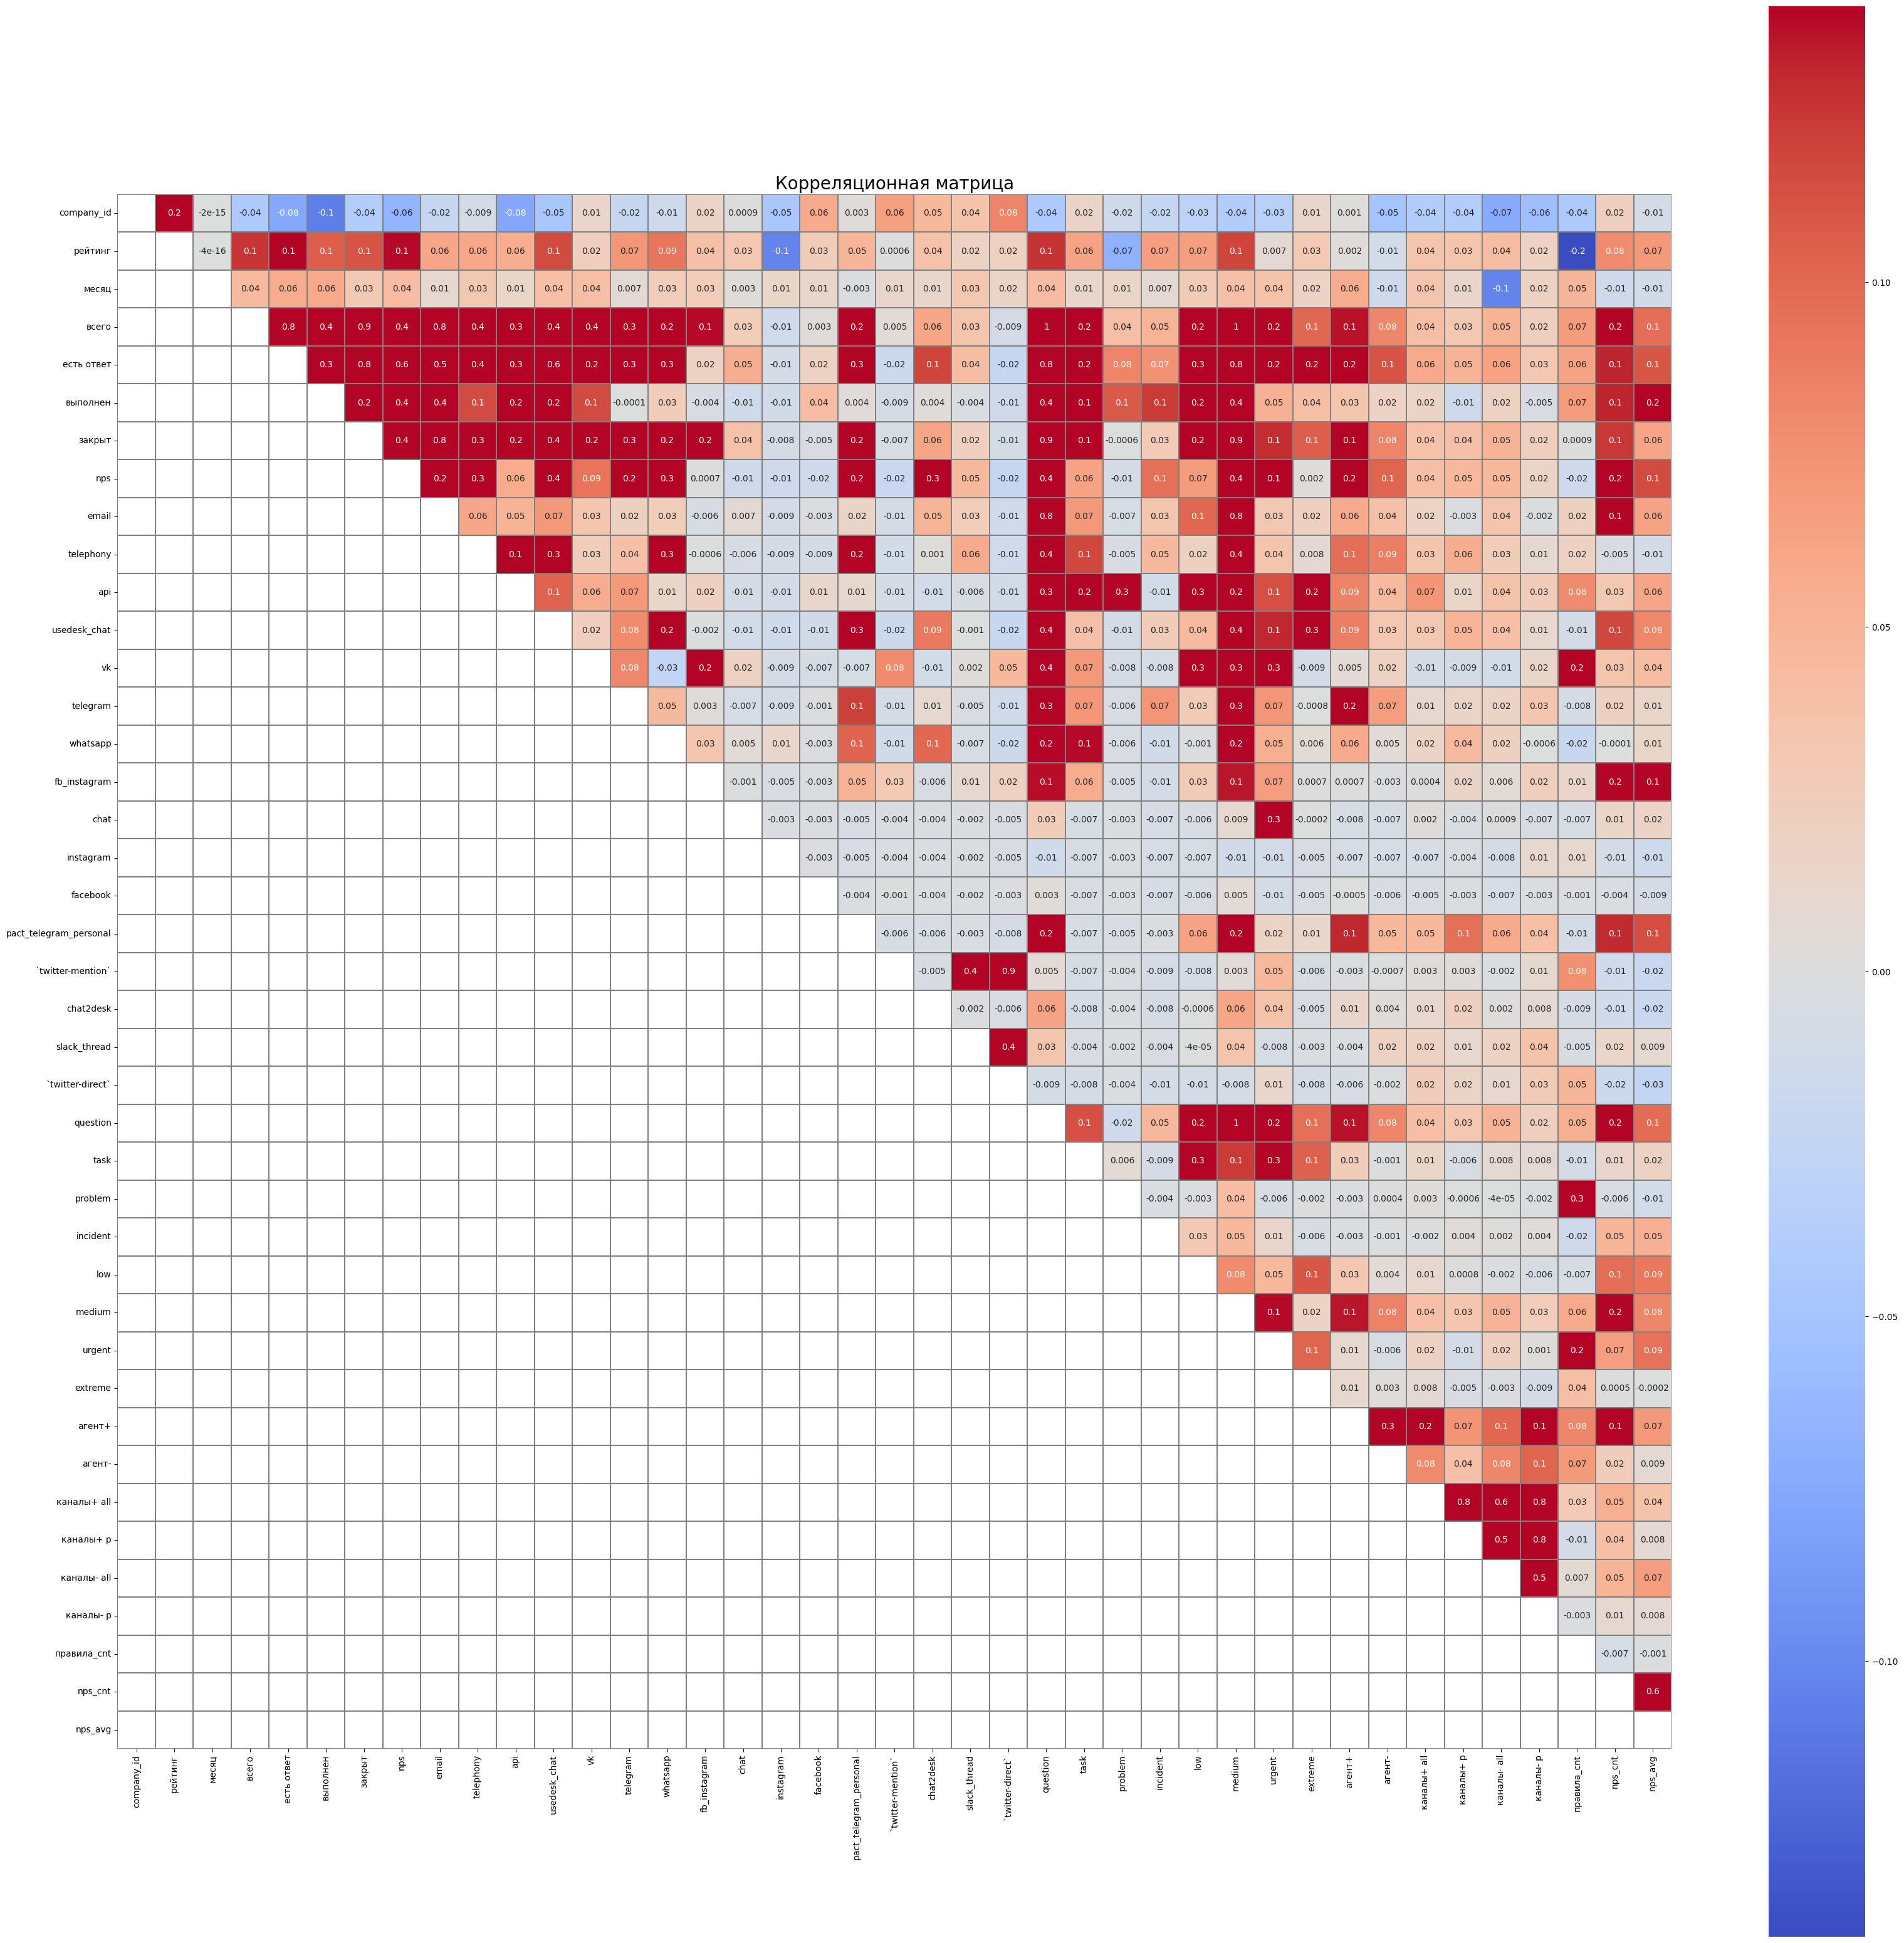

In [ ]:

# Таблица корреляции признаков
mask_1 = np.tril(df_cor.corr()) # берем нижний треугольник массива  корреляционных параметров
plt.figure(figsize=(40,40))
sns.heatmap(df_cor.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()


## **2** **Ансамблевые модели**

2.1 **Стекинг** (Stacking)

In [ ]:
# Разобьем выборки на обьучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
scaler = StandardScaler() #  (стандартный масштабатор) используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelClf = StackingClassifier(estimators=estimators, final_estimator=SVC())
modelClf.fit(X_train, y_train)
print(modelClf.score(X_test, y_test)) # Возвращает среднюю точность по заданным тестовым данным и меткам
# occurrences (y_train, y_test) # Проверка распределения значений y=1 между y_train и y_test
#my_display_result(y_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.9769503546099291


2.2 **Бэггинг** (Bagging)

In [ ]:
# Разобьем выборки на обьучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
scaler = StandardScaler() #  (стандартный масштабатор) используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelClf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=12)
modelClf.fit(X_train, y_train)
print(modelClf.score(X_test, y_test))
#occurrences (y_train, y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8687943262411347


2.3 **Бустинг** (Boosting)

2.3.1
Адаптивный бустинг (AdaBoost)

In [ ]:
# Разобьем выборки на обьучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
scaler = StandardScaler() #  (стандартный масштабатор) используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelClf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)
modelClf.fit(X_train, y_train)
print(modelClf.score(X_test, y_test))

0.9911347517730497


2.3.2 Градиентный бустинг (GradientBoost)

In [ ]:
# Разобьем выборки на обьучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
scaler = StandardScaler() #  (стандартный масштабатор) используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelClf = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)
modelClf.fit(X_train, y_train)
print(modelClf.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9858156028368794


# **3 AutoML**

In [ ]:
import autokeras as ak
from IPython.display import display
# from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend


In [ ]:
# разделение датасета на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# вывод размеров обучающей и проверочной выборок
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер проверочной выборки: {X_test.shape[0]}')

Размер обучающей выборки: 1692
Размер проверочной выборки: 564


# 3.1 Тюнер **Random** (по умолчанию), 50 запусков.

In [ ]:
# инициализация класса автоматического машинного обучения
reg = ak.StructuredDataRegressor(
    overwrite=True,
    max_trials=50,
    loss='mean_squared_error',
    metrics=['mean_absolute_error'],
    project_name='weekly_sales_forecast'
)

# поиск лучшей модели
reg.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Trial 50 Complete [00h 00m 22s]
val_loss: 0.13994984328746796

Best val_loss So Far: 0.06479351967573166
Total elapsed time: 00h 18m 55s
Epoch 1/20
53/53 [==============================] - 2s 12ms/step - loss: 0.2786 - mean_absolute_error: 0.4357 - val_loss: 0.1880 - val_mean_absolute_error: 0.3650
Epoch 2/20
53/53 [==============================] - 0s 5ms/step - loss: 0.1595 - mean_absolute_error: 0.3325 - val_loss: 0.1381 - val_mean_absolute_error: 0.3129
Epoch 3/20
53/53 [==============================] - 0s 6ms/step - loss: 0.1327 - mean_absolute_error: 0.2957 - val_loss: 0.1190 - val_mean_absolute_error: 0.2727
Epoch 4/20
53/53 [==============================] - 0s 5ms/step - loss: 0.1244 - mean_absolute_error: 0.2805 - val_loss: 0.1053 - val_mean_absolute_error: 0.2561
Epoch 5/20
53/53 [==============================] - 0s 6ms/step - loss: 0.1157 - mean_absolute_error: 0.2612 - val_loss: 0.1040 - val_mean_absolute_error: 0.2561
Epoch 6/20
53/53 [==============================] - 

In [ ]:
best_model = reg.export_model()
# Получите архитектуру модели в виде JSON строки
model_json = best_model.to_json()

print("Model architecture:")
print(model_json)

Model architecture:
{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 40], "dtype": "float64", "sparse": false, "ragged": false, "name": "input_1"}, "registered_name": null, "name": "input_1", "inbound_nodes": []}, {"module": "autokeras.keras_layers", "class_name": "MultiCategoryEncoding", "config": {"name": "multi_category_encoding", "trainable": true, "dtype": "float32", "encoding": ["none", "int", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "int", "int", "int", "int", "int", "int", "int", "int", "none", "none", "none", "int", "none", "none", "none", "none", "int", "int", "int", "int", "int", "int", "none", "int", "int"]}, "registered_name": "Custom>MultiCategoryEncoding", "build_config": {"input_shape": [null, 40]}, "name": "multi_category_encoding", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, 

In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 multi_category_encoding (M  (None, 40)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 40)                81        
 on)                                                             
                                                                 
 dense (Dense)               (None, 16)                656       
                                                                 
 re_lu (ReLU)                (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1024)              17408 

# 3.2 Тюнер **"hyperband"**, 50 запусков.

In [ ]:
# разделение датасета на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# инициализация класса автоматического машинного обучения
reg2 = ak.StructuredDataRegressor(
    overwrite=True,
    max_trials=50,
    tuner="hyperband",
    loss='mean_squared_error',
    metrics=['mean_absolute_error'],
    project_name='weekly_sales_forecast2'
)

# поиск лучшей модели
reg2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Trial 50 Complete [00h 00m 11s]
val_loss: 0.23113290965557098

Best val_loss So Far: 0.1356450617313385
Total elapsed time: 00h 07m 57s
Epoch 1/20
53/53 [==============================] - 3s 13ms/step - loss: 0.2397 - mean_absolute_error: 0.3740 - val_loss: 0.3798 - val_mean_absolute_error: 0.4780
Epoch 2/20
53/53 [==============================] - 0s 6ms/step - loss: 0.1167 - mean_absolute_error: 0.2682 - val_loss: 0.1584 - val_mean_absolute_error: 0.2733
Epoch 3/20
53/53 [==============================] - 0s 5ms/step - loss: 0.1045 - mean_absolute_error: 0.2493 - val_loss: 0.1960 - val_mean_absolute_error: 0.2857
Epoch 4/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0972 - mean_absolute_error: 0.2350 - val_loss: 0.1606 - val_mean_absolute_error: 0.2540
Epoch 5/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0926 - mean_absolute_error: 0.2295 - val_loss: 0.1288 - val_mean_absolute_error: 0.2653
Epoch 6/20
53/53 [==============================] - 0

In [ ]:
best_model2 = reg2.export_model()
# Получите архитектуру модели в виде JSON строки
model_json2 = best_model2.to_json()

print("Model architecture:")
print(model_json2)

Model architecture:
{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 40], "dtype": "float64", "sparse": false, "ragged": false, "name": "input_1"}, "registered_name": null, "name": "input_1", "inbound_nodes": []}, {"module": "autokeras.keras_layers", "class_name": "MultiCategoryEncoding", "config": {"name": "multi_category_encoding", "trainable": true, "dtype": "float32", "encoding": ["none", "int", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "int", "int", "int", "int", "int", "int", "int", "int", "none", "none", "none", "int", "none", "none", "none", "none", "int", "int", "int", "int", "int", "int", "none", "int", "int"]}, "registered_name": "Custom>MultiCategoryEncoding", "build_config": {"input_shape": [null, 40]}, "name": "multi_category_encoding", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, 

In [ ]:
best_model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 multi_category_encoding (M  (None, 40)                0         
 ultiCategoryEncoding)                                           
                                                                 
 dense (Dense)               (None, 256)               10496     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224  

# 3.3 Тюнер  **"greedy"**, 50 запусков

In [ ]:
# разделение датасета на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# создание и обучение модели
reg3 = ak.AutoModel(
    inputs=ak.StructuredDataInput(),
    outputs=ak.RegressionHead(),
    max_trials=50,
    tuner="greedy",
    loss='mean_squared_error',
    metrics=['mean_absolute_error'],
    project_name='weekly_sales_forecast3',
    overwrite=True)
reg3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# оценка модели
results = reg3.evaluate(X_test, y_test)
print(results)

Trial 50 Complete [00h 00m 19s]
val_loss: 0.16472359001636505

Best val_loss So Far: 0.10399536788463593
Total elapsed time: 00h 23m 01s
Epoch 1/20
53/53 [==============================] - 5s 38ms/step - loss: 0.9487 - mean_absolute_error: 0.7120 - val_loss: 0.5736 - val_mean_absolute_error: 0.6448
Epoch 2/20
53/53 [==============================] - 1s 18ms/step - loss: 0.7930 - mean_absolute_error: 0.5311 - val_loss: 0.7884 - val_mean_absolute_error: 0.6382
Epoch 3/20
53/53 [==============================] - 1s 17ms/step - loss: 0.4714 - mean_absolute_error: 0.4433 - val_loss: 0.4811 - val_mean_absolute_error: 0.4613
Epoch 4/20
53/53 [==============================] - 1s 19ms/step - loss: 0.1930 - mean_absolute_error: 0.3368 - val_loss: 0.1378 - val_mean_absolute_error: 0.2539
Epoch 5/20
53/53 [==============================] - 1s 17ms/step - loss: 0.1294 - mean_absolute_error: 0.2888 - val_loss: 0.1484 - val_mean_absolute_error: 0.2534
Epoch 6/20
53/53 [==============================

In [ ]:
best_model3 = reg3.export_model()
# Получите архитектуру модели в виде JSON строки
model_json3 = best_model3.to_json()

print("Model architecture:")
print(model_json3)

Model architecture:
{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 40], "dtype": "float64", "sparse": false, "ragged": false, "name": "input_1"}, "registered_name": null, "name": "input_1", "inbound_nodes": []}, {"module": "autokeras.keras_layers", "class_name": "MultiCategoryEncoding", "config": {"name": "multi_category_encoding", "trainable": true, "dtype": "float32", "encoding": ["none", "int", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "none", "int", "int", "int", "int", "int", "int", "int", "int", "none", "none", "none", "int", "none", "none", "none", "none", "int", "int", "int", "int", "int", "int", "none", "int", "int"]}, "registered_name": "Custom>MultiCategoryEncoding", "build_config": {"input_shape": [null, 40]}, "name": "multi_category_encoding", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, 

In [ ]:
best_model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 multi_category_encoding (M  (None, 40)                0         
 ultiCategoryEncoding)                                           
                                                                 
 dense (Dense)               (None, 512)               20992     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312